In [1]:
import datetime
from dateutil.relativedelta import *

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import japanize_matplotlib

from pytrends.request import TrendReq

In [2]:
def get_df(kw_list, country, timerange, group_filter, category):
    pytrends.build_payload(kw_list, cat=category, timeframe=timerange, geo=country, gprop=group_filter)
    # gprop = 'images', 'news', 'youtube' or 'froogle' (for Google Shopping results)
    # cat = 105 (for Online Games)
    # link to see other categories (https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)
    
    df = pd.DataFrame(pytrends.interest_over_time())
    df = df.reset_index()
    try:
        df = df.drop(columns='isPartial')
    except:
        pass
    return df

def plot_generater(kw_list, country, timerange, group_filter, title, category):
    df = get_df(kw_list, country, timerange, group_filter, category)
    sns.set(font='IPAexGothic')
    sns.set_context("notebook", font_scale=1.1)
    plt.figure(figsize=(8, 4))
    df = df.melt('date', var_name='keywords',  value_name='popularity %')
    lineplot = sns.lineplot(x="date", y="popularity %", hue='keywords', data=df, alpha=0.6)
    lineplot.set_title(title)
    #lineplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(title+' - '+kw_list[0]+'.png', dpi=300, bbox_inches='tight')
    plt.show()

    
def get_timerange():
    today = datetime.date.today()
    past_5years = today+relativedelta(years=-5)
    past_1year = today+relativedelta(years=-1)
    past_3months = today+relativedelta(months=-3)

    today = today.strftime("%Y-%m-%d")
    past_5years = past_5years.strftime("%Y-%m-%d")
    past_1year = past_1year.strftime("%Y-%m-%d")
    past_3months = past_3months.strftime("%Y-%m-%d")

    past_5years = past_5years+' '+ today
    past_1year = past_1year+' '+ today
    past_3months = past_3months+' '+ today
    return past_5years, past_1year, past_3months 


def get_barplot(df, title):
    sns.set(font='IPAexGothic')
    sns.set_context("notebook", font_scale=1.1)
    #plt.figure(figsize=(8, 4))
    if 'topic_title' in df.columns:
        countplot = sns.barplot(x='value', y='topic_title', data=df, alpha=0.6)
    else:
        countplot = sns.barplot(x='value', y='query', data=df, alpha=0.6)
    countplot.set_title(title)
    countplot.set_xlabel('rising %')
    plt.savefig(title+'.png', dpi=300, bbox_inches='tight')
    plt.show()

def main(kw_list, country, group_filter, category, title):
    past_5years, past_1year, past_3months = get_timerange()
    plot_generater(kw_list, country, past_5years, group_filter, '東京オリンピックの過去5年間の検索履歴（'+title+'）', category)
    plot_generater(kw_list, country, past_1year, group_filter, '東京オリンピックの過去1年間の検索履歴（'+title+'）', category)
    plot_generater(kw_list, country, past_3months, group_filter, '東京オリンピックの過去3ヶ月間の検索履歴（'+title+'）', category)

    for word in kw_list:
        pytrends.build_payload(kw_list=[word], cat=category, timeframe=past_3months, geo=country, gprop=group_filter)
        related_topic = pytrends.related_topics()
        try:
            data = related_topic[word]['rising'].sort_values(by=['value'], ascending=False).iloc[:10]
            get_barplot(data, '『'+word+'』に関する人気上昇中の話題 - 過去3ヶ月間')
            related_queries = pytrends.related_queries()
            data = related_queries[word]['rising'].sort_values(by=['value'], ascending=False).iloc[:10]
            get_barplot(data, '『'+word+'』に関する人気上昇中の質問 - 過去3ヶ月間')
        except:
            pass


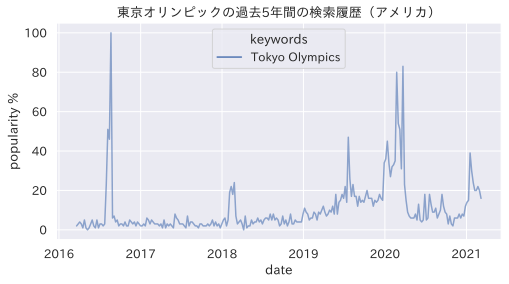

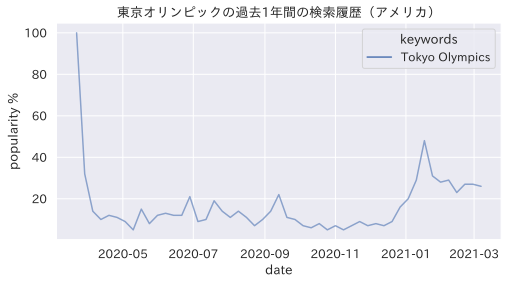

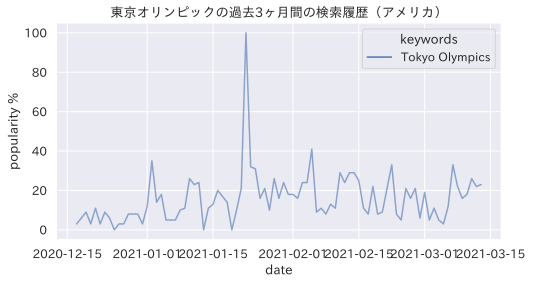

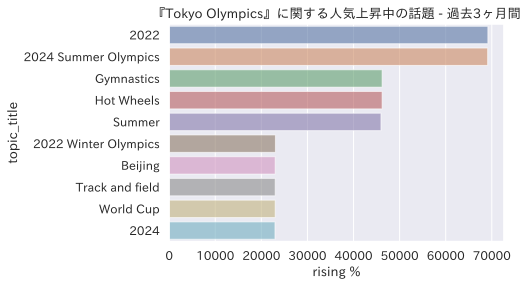

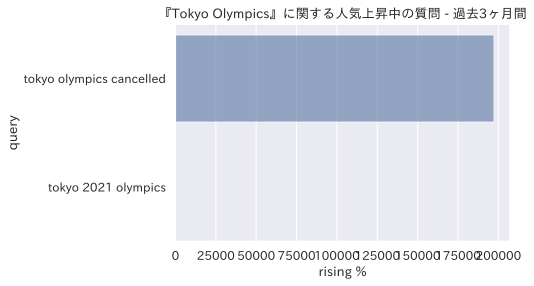

In [3]:
pytrends = TrendReq(hl='en-US', tz=360)
country = 'US'
group_filter='' # Default is web serach, 'images', 'news', 'youtube' or 'froogle' (for Google Shopping results)
category = 0 # All
kw_list = ['Tokyo Olympics']
main(kw_list, country, group_filter, category, 'アメリカ')

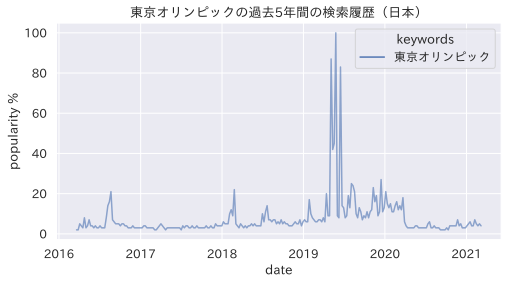

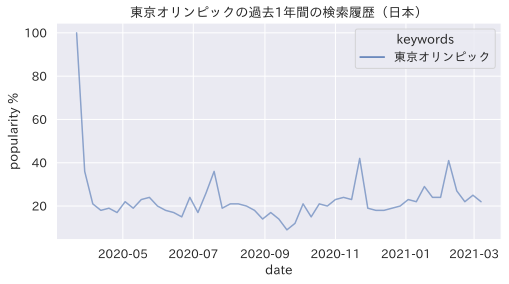

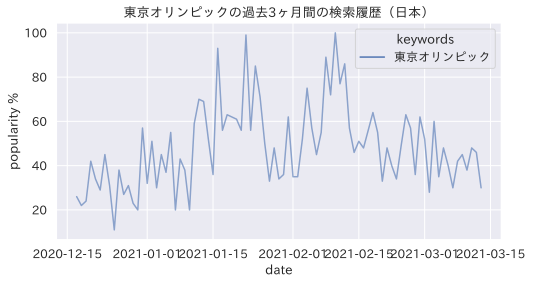

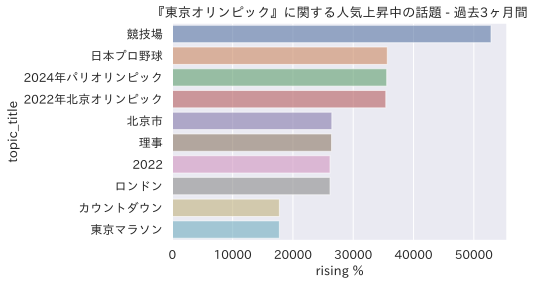

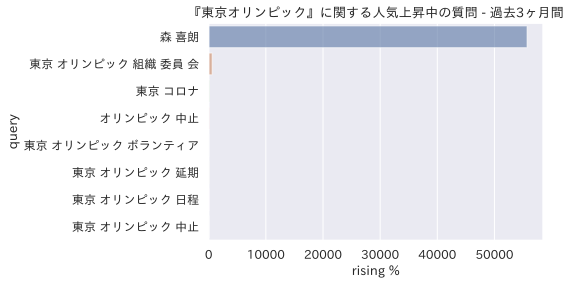

In [4]:
pytrends = TrendReq(hl='ja-JP', tz=540)
country = 'JP'
group_filter='' # Default is web serach, 'images', 'news', 'youtube' or 'froogle' (for Google Shopping results)
category = 0 # All
kw_list = ['東京オリンピック']
main(kw_list, country, group_filter, category, '日本')

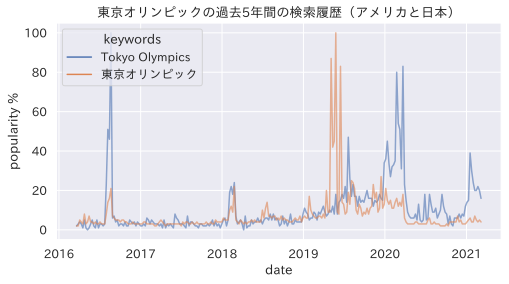

In [5]:
def plot_generater_combine(df_all, title):
    sns.set(font='IPAexGothic')
    sns.set_context("notebook", font_scale=1.1)
    plt.figure(figsize=(8, 4))
    df_all = df_all.melt('date', var_name='keywords',  value_name='popularity %')
    lineplot = sns.lineplot(x="date", y="popularity %", hue='keywords', data=df_all, alpha=0.6)
    lineplot.set_title(title)
    #lineplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(title+' - '+kw_list[0]+'.png', dpi=300);
    plt.show()
    
    
pytrends = TrendReq(hl='en-US', tz=360)
country = 'US'
group_filter='' # Default is web serach, 'images', 'news', 'youtube' or 'froogle' (for Google Shopping results)
category = 0 # All
kw_list = ['Tokyo Olympics']
title = 'アメリカ'

past_5years, past_1year, past_3months = get_timerange()
df_usa_5y = get_df(kw_list, country, past_5years, group_filter, category)

pytrends = TrendReq(hl='ja-JP', tz=540)
country = 'JP'
group_filter='' # Default is web serach, 'images', 'news', 'youtube' or 'froogle' (for Google Shopping results)
category = 0 # All
kw_list = ['東京オリンピック']
title = '日本'

past_5years, past_1year, past_3months = get_timerange()
df_jp_5y = get_df(kw_list, country, past_5years, group_filter, category)

df_usa_5y['東京オリンピック'] = df_jp_5y['東京オリンピック']

plot_generater_combine(df_usa_5y, '東京オリンピックの過去5年間の検索履歴（アメリカと日本）')